## Observations and Insights 

In [135]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_results = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_study_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
unique_mouse_count = len(mouse_study_results["Mouse ID"].unique())
unique_mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Find any duplicated mice, in this case we found one duplicated by ID and Timepoint
duplicated_mice = mouse_study_results[mouse_study_results.duplicated(['Mouse ID', 'Timepoint'])]
dupicated_mice_id = duplicated_mice["Mouse ID"].unique()
dupicated_mice_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.

# Showing the offending mouse
mouse_study_results[mouse_study_results["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Removing offending mouse, creating another dataframe
clean_mouse_study_results = mouse_study_results.loc[mouse_study_results["Mouse ID"] != "g989",:]
clean_mouse_study_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.

# Get unique number of mice after removing the bogus repeating mouse (notice it is one less than original data)
unique_clean_mouse_study_count = clean_mouse_study_results["Mouse ID"].unique()
len(unique_clean_mouse_study_count)

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Going to use tumor value later to setup multi-index to make it look like the agg() function output below
tumor_volume = "Tumor Volume (mm3)"

# Build the series
drug_regimen_mean = clean_mouse_study_results.groupby("Drug Regimen")[tumor_volume].mean()
drug_regimen_median = clean_mouse_study_results.groupby("Drug Regimen")[tumor_volume].median()
drug_regimen_variance = clean_mouse_study_results.groupby("Drug Regimen")[tumor_volume].var()
drug_regimen_stddev = clean_mouse_study_results.groupby("Drug Regimen")[tumor_volume].std()
drug_regimen_sem = clean_mouse_study_results.groupby("Drug Regimen")[tumor_volume].sem()

# Create the dataframe
summary_stats_table_1 = pd.DataFrame({
    "mean" : drug_regimen_mean,
    "median" : drug_regimen_median,
    "var": drug_regimen_variance,
    "std": drug_regimen_stddev,
    "sem": drug_regimen_sem,
})

# Create the multi-index, once again to mirror the output of the agg() function below
mIdxcols = pd.MultiIndex.from_tuples([(tumor_volume,'mean'),(tumor_volume,'median'),(tumor_volume,'var'),(tumor_volume,'std'),(tumor_volume,'sem')])
summary_stats_table_1.columns = mIdxcols

summary_stats_table_1

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

# Use single line aggregation to produce the summary (it is a single line just formatted for easier reading)
summary_stats_table_2 = clean_mouse_study_results.groupby("Drug Regimen").agg({
        "Tumor Volume (mm3)" : ["mean", "median", "var", "std", "sem"], 
    }
)
summary_stats_table_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

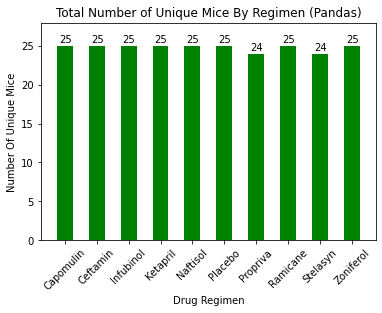

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# Get unique mice by drug regimen
unique_mice_by_regimen = clean_mouse_study_results.groupby("Drug Regimen")["Mouse ID"].nunique()

# Plot bar chart using Pandas save off the axis so I can annotate
ax = unique_mice_by_regimen.plot(kind="bar", color="green", alpha=1.0, width=0.5)

# Enumerate through the list mice by region and add annotations
for i, x in enumerate(unique_mice_by_regimen):
    ax.annotate(x, (i, x), xytext=(-6,3), textcoords='offset points')

# Ticks were already there but I want them at a 45 degree angle    
x_ticks = unique_mice_by_regimen.index.values
x_axis = np.arange(len(x_ticks))
plt.xticks(x_axis, x_ticks, rotation=45)

# Various other tweeks to make the graph look better
plt.title("Total Number of Unique Mice By Regimen (Pandas)")
plt.ylabel("Number Of Unique Mice")
plt.ylim(0, max(unique_mice_by_regimen)+3)
plt.xlim(-0.75, len(unique_mice_by_regimen)-0.25)

# Show the graph
plt.show()
plt.tight_layout()

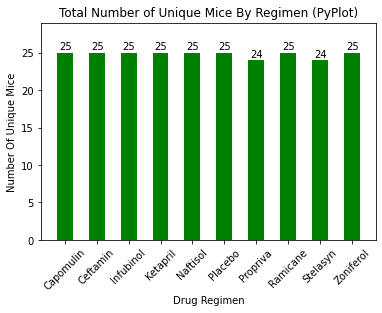

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

# Create a subplot so I can add annotations to the pyplot
fig, ax = plt.subplots()
ax.bar(x_axis, unique_mice_by_regimen, color='g', width = 0.5, alpha=1.0, align="center")

#Enumerate through the list mice by region and add annotations
for i, x in enumerate(unique_mice_by_regimen):
    ax.annotate(x, (i, x), xytext=(-6,3), textcoords='offset points')

# Setup ticks at a 45 degree angle    
x_ticks = unique_mice_by_regimen.index.values
x_axis = np.arange(len(x_ticks))
plt.xticks(x_axis, x_ticks, rotation=45)

# Various other tweeks to make the graph look better
plt.title("Total Number of Unique Mice By Regimen (PyPlot)")
plt.xlabel("Drug Regimen")
plt.ylabel("Number Of Unique Mice")
plt.ylim(0, max(unique_mice_by_regimen)+4)
plt.xlim(-0.75, len(unique_mice_by_regimen)-0.25)

# Show the graph
plt.show()
plt.tight_layout()

In [11]:
# Get the groupby sex for unique mice
unique_mice_by_sex = clean_mouse_study_results.groupby("Sex")["Mouse ID"].nunique()
unique_mice_by_sex

colors = ['red','blue']
explode = [0.0,0.1]
labels = ["Female", "Male"]

Text(0, 0.5, '')

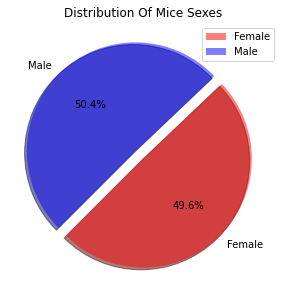

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
ax = unique_mice_by_sex.plot(kind="pie", shadow = True, autopct='%1.1f%%', startangle=225,
                             figsize=(10,5), colors=colors, explode=explode, legend=True, 
                             title="Distribution Of Mice Sexes",
                             wedgeprops={'alpha':0.5})
ax.set_ylabel('')

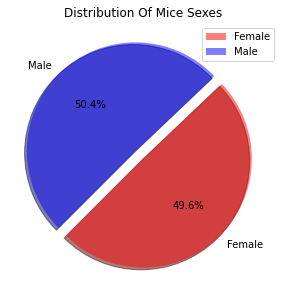

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig, ax = plt.subplots(figsize=(10, 5))
plt.pie(unique_mice_by_sex, shadow = True, autopct='%1.1f%%', startangle=225,  colors=colors, explode=explode, 
        labels=labels, wedgeprops={'alpha':0.5})
ax.set_title("Distribution Of Mice Sexes")
plt.legend(labels, loc="upper right")

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
gb = clean_mouse_study_results.groupby(["Mouse ID"])
max_timepoint_df = gb.agg({"Timepoint":"max"})
max_timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mice_last_timepoint_df = pd.merge(clean_mouse_study_results, max_timepoint_df, on=["Mouse ID", "Timepoint"])
mice_last_timepoint_df

regimen_mice_filter_df = mice_last_timepoint_df[(mice_last_timepoint_df["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"]))]
regimen_mice_filter_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [91]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = regimen_mice_filter_df["Drug Regimen"].unique()
treatment_list = [x for x in treatments]
treatment_axis = np.arange(start=1, stop=len(treatment_list)+1)  
print(treatment_list)

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
tumors_Capomulin = regimen_mice_filter_df.loc[ regimen_mice_filter_df["Drug Regimen"] == "Capomulin","Tumor Volume (mm3)"]
tumors_Ramicane = regimen_mice_filter_df.loc[ regimen_mice_filter_df["Drug Regimen"] == "Ramicane","Tumor Volume (mm3)"]
tumors_Infubinol = regimen_mice_filter_df.loc[ regimen_mice_filter_df["Drug Regimen"] == "Infubinol","Tumor Volume (mm3)"]
tumors_Ceftamin = regimen_mice_filter_df.loc[ regimen_mice_filter_df["Drug Regimen"] == "Ceftamin","Tumor Volume (mm3)"]

    # add subset 
Capomulin_q = tumors_Capomulin.quantile([0.25,0.5,0.75])    
Ramicane_q =  tumors_Ramicane.quantile([0.25,0.5,0.75]) 
Infubinol_q = tumors_Infubinol.quantile([0.25,0.5,0.75])
Ceftamin_q = tumors_Ceftamin.quantile([0.25,0.5,0.75])

    # Determine outliers using upper and lower bounds
Capomulin_l = Capomulin_q[0.25]
Capomulin_u = Capomulin_q[0.75]
Capomulin_iqr = Capomulin_u - Capomulin_l
Capomulin_lb = Capomulin_l - (1.5*Capomulin_iqr)
Capomulin_ub = Capomulin_u + (1.5*Capomulin_iqr)

print(f"The lower quartile of Capomulin is: {Capomulin_l}")
print(f"The upper quartile of Capomulin is: {Capomulin_u}")
print(f"The interquartile range of Capomulin is: {Capomulin_iqr}")
print(f"The the median of Capomulin is: {Capomulin_q[0.5]} ")
print(f"Capomulin values below {Capomulin_lb} could be outliers.")
print(f"Capomulin values above {Capomulin_ub} could be outliers.")
print("\n")

Ramicane_l = Ramicane_q[0.25]
Ramicane_u = Ramicane_q[0.75]
Ramicane_iqr = Ramicane_u - Ramicane_l
Ramicane_lb = Ramicane_l - (1.5*Ramicane_iqr)
Ramicane_ub = Ramicane_u + (1.5*Ramicane_iqr)

print(f"The lower quartile of Ramicane is: {Ramicane_l}")
print(f"The upper quartile of Ramicane is: {Ramicane_u}")
print(f"The interquartile range of Ramicane is: {Ramicane_iqr}")
print(f"The the median of Ramicane is: {Ramicane_q[0.5]} ")
print(f"Ramicane values below {Ramicane_lb} could be outliers.")
print(f"Ramicane values above {Ramicane_ub} could be outliers.")
print("\n")

Infubinol_l = Infubinol_q[0.25]
Infubinol_u = Infubinol_q[0.75]
Infubinol_iqr = Infubinol_u - Infubinol_l
Infubinol_lb = Infubinol_l - (1.5*Infubinol_iqr)
Infubinol_ub = Infubinol_u + (1.5*Infubinol_iqr)

print(f"The lower quartile of Infubinol is: {Infubinol_l}")
print(f"The upper quartile of Infubinoll is: {Infubinol_u}")
print(f"The interquartile range of Infubinol is: {Infubinol_iqr}")
print(f"The the median of Infubinol is: {Infubinol_q[0.5]} ")
print(f"Infubinol values below {Infubinol_lb} could be outliers.")
print(f"Infubinol values above {Infubinol_ub} could be outliers.")
print("\n")

Ceftamin_l = Ceftamin_q[0.25]
Ceftamin_u = Ceftamin_q[0.75]
Ceftamin_iqr = Ceftamin_u - Ceftamin_l
Ceftamin_lb = Ceftamin_l - (1.5*Ceftamin_iqr)
Ceftamin_ub = Ceftamin_u + (1.5*Ceftamin_iqr)

print(f"The lower quartile of Ceftamin is: {Ceftamin_l}")
print(f"The upper quartile of Ceftamin is: {Ceftamin_u}")
print(f"The interquartile range of Ceftamin is: {Ceftamin_iqr}")
print(f"The the median of Ceftamin is: {Ceftamin_q[0.5]} ")
print(f"Ceftamin values below {Ceftamin_lb} could be outliers.")
print(f"Ceftamin values above {Ceftamin_ub} could be outliers.")

['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin']
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Capomulin values below 20.70456164999999 could be outliers.
Capomulin values above 51.83201549 could be outliers.


The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Ramicane values below 17.912664470000003 could be outliers.
Ramicane values above 54.30681135 could be outliers.


The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinoll is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Infubinol values below 36.83290494999999 could be outliers.
Infubinol values above 82.74144559000001 could be outl

Text(0.5, 1.0, 'Tumor Volume by Treatment for Mice')

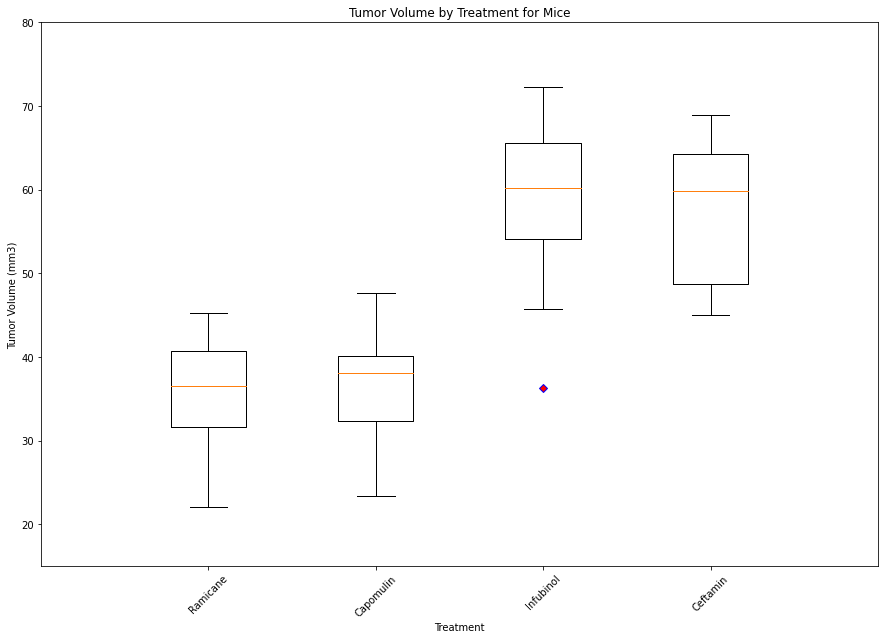

In [88]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize=(15, 10))
bp = ax1.boxplot([tumors_Ramicane, tumors_Capomulin, tumors_Infubinol, tumors_Ceftamin ])
plt.setp(bp['fliers'], markeredgecolor='blue', markerfacecolor="red", marker='D')
ax1.set_xticks(treatment_axis)
ax1.set_xticklabels(treatment_list, rotation=45)
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xlabel("Treatment")
ax1.set_xlim(0, len(treatment_list)+1)
ax1.set_ylim(15, 80)
ax1.set_title("Tumor Volume by Treatment for Mice")


## Line and Scatter Plots

['s185' 'x401' 'm601' 'f966' 'u364' 'y793' 'r554' 'm957' 't565' 'i738'
 'w914' 'g288' 'l897' 'b742' 'b128' 'j246' 'j119' 'w150' 'v923' 'g316'
 's710' 'l509' 'r944' 'i557' 'r157']


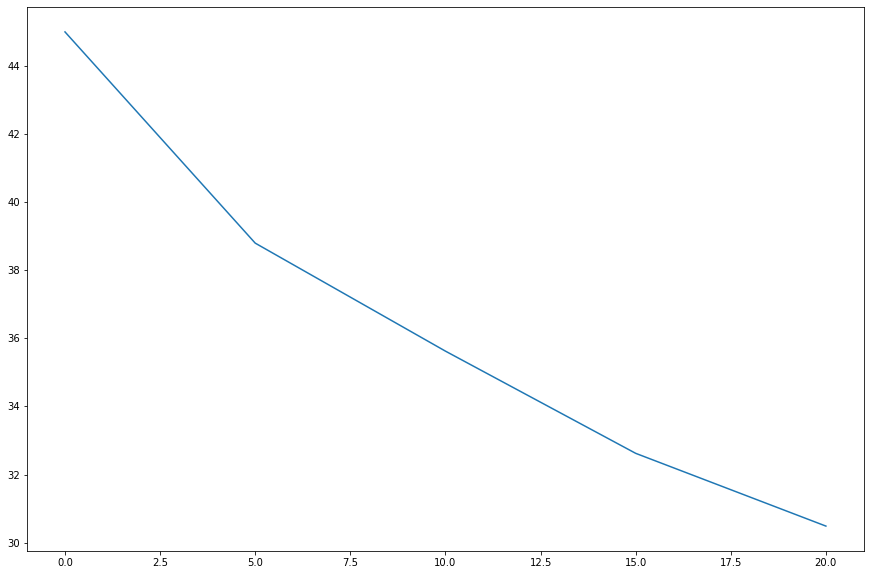

In [120]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_with_capomulin_treatment = clean_mouse_study_results[clean_mouse_study_results["Drug Regimen"]=="Capomulin"]
print(mouse_with_capomulin_treatment["Mouse ID"].unique())
mouse_id = "f966"
mouse_with_capomulin_treatment = mouse_with_capomulin_treatment[mouse_with_capomulin_treatment["Mouse ID"]==mouse_id]
mouse_with_capomulin_treatment = mouse_with_capomulin_treatment.sort_values(by=["Timepoint"], ascending=True)
mouse_with_capomulin_treatment

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.plot(mouse_with_capomulin_treatment["Timepoint"], mouse_with_capomulin_treatment["Tumor Volume (mm3)"])

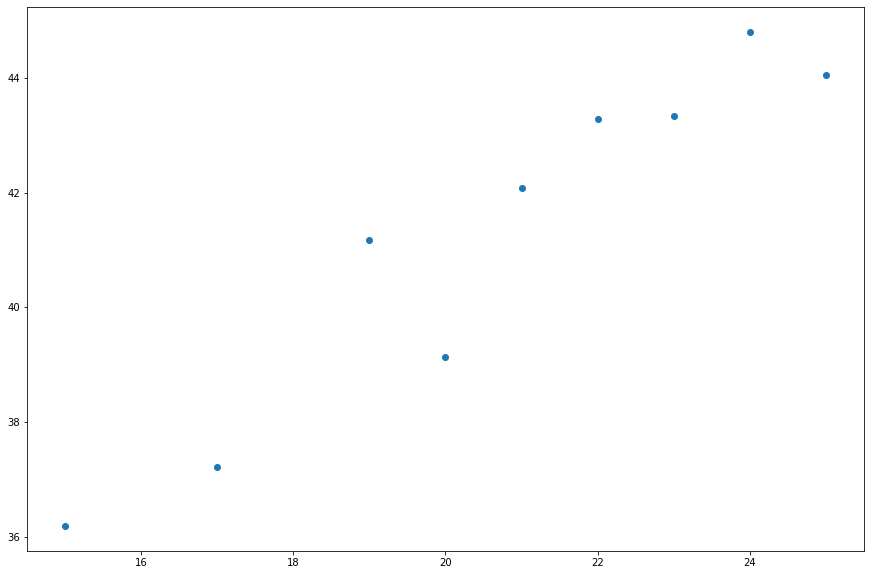

In [134]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_treatment = "Capomulin"
#scatter_treatment = "Ramicane"
#scatter_treatment = "Infubinol"
#scatter_treatment = "Ceftamin"
capomulin_atv_df = clean_mouse_study_results[clean_mouse_study_results["Drug Regimen"]==scatter_treatment]
capomulin_atv_df
capomulin_atv_by_weight_df = capomulin_atv_df.groupby("Weight (g)").agg({"Tumor Volume (mm3)":"mean"})
capomulin_atv_by_weight_df.reset_index(level=0, inplace=True)
capomulin_atv_by_weight_df

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.scatter(capomulin_atv_by_weight_df["Weight (g)"], capomulin_atv_by_weight_df["Tumor Volume (mm3)"])

## Correlation and Regression

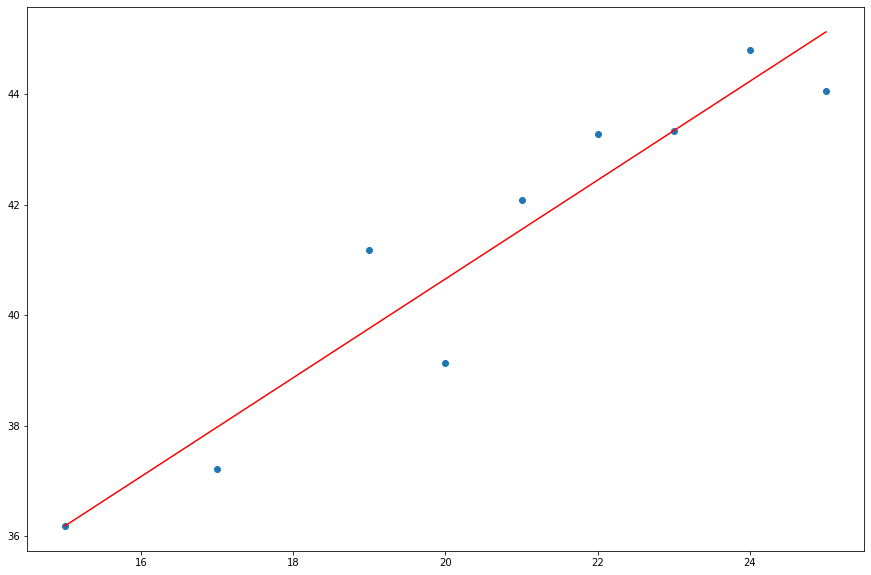

In [137]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# `correlation` tells you how strong the relationship is, between 0 and 1. `p_value`
# tells you if that relationship is statistically significant (look for values < 0.05)
correlation, p_value = st.pearsonr(capomulin_atv_by_weight_df["Weight (g)"], capomulin_atv_by_weight_df["Tumor Volume (mm3)"])

# `slope` and `intercept` allow you to draw a y = mx + b line. `rvalue` is interpreted
# as the variability in your data that is explainable by the model. `p_value` is similar 
# to above. `stderr` is a bit technical, but similar to the standard error of the mean
# we looked at previously, a smaller value is "better"
slope, intercept, rvalue, pvalue, stderr = linregress(capomulin_atv_by_weight_df["Weight (g)"], capomulin_atv_by_weight_df["Tumor Volume (mm3)"])

regress_values = capomulin_atv_by_weight_df["Weight (g)"] * slope + intercept

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.scatter(capomulin_atv_by_weight_df["Weight (g)"], capomulin_atv_by_weight_df["Tumor Volume (mm3)"])
ax1.plot(capomulin_atv_by_weight_df["Weight (g)"], regress_values, "r-")
